In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("/Users/macbookair/Downloads/911.csv")

In [5]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [8]:
df["title"].nunique()

148

In [9]:
df["Reason"]= df["title"].apply(lambda title: title.split(":")[0]) #splitting the title column to get the reason for the call
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [10]:
df["Reason"].value_counts(
).head(5)

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

/var/folders/l5/2d_7lr8s39s5mj_dy2ty07tm0000gn/T/ipykernel_64394/2111413274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Reason", data=df, palette="twilight") #countplot of 911 calls by Reason


<Axes: xlabel='Reason', ylabel='count'>

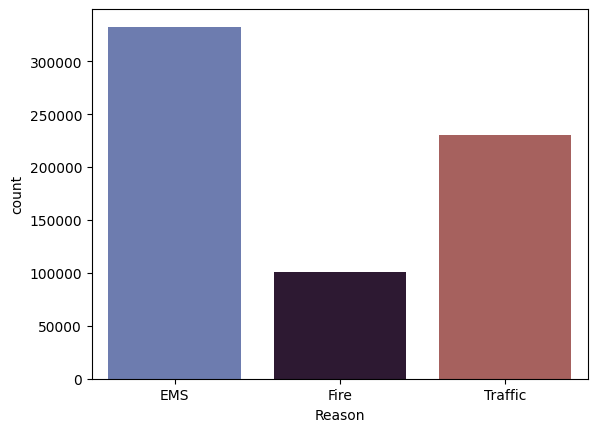

In [11]:
sns.countplot(x="Reason", data=df, palette="twilight") #countplot of 911 calls by Reason

In [12]:
type(df["timeStamp"].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp']) #converting the timeStamp column from strings to DateTime objects
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
time = df["timeStamp"].iloc[0] #creating 3 new columns called Hour, Month, and Day of Week
time.dayofweek
df["Hour"]= df["timeStamp"].apply(lambda time: time.hour)
df["Month"]= df["timeStamp"].apply(lambda time: time.month)
df["Day"]= df["timeStamp"].apply(lambda time: time.dayofweek)

In [62]:
mapping ={ 0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri",5:"Sat", 6:"Sun"} #mapping the actual string names to the day of the week
df['Week Day'] = df['Day'].map(mapping)

[Text(0.5, 1.0, 'Reason by Days of the Week')]

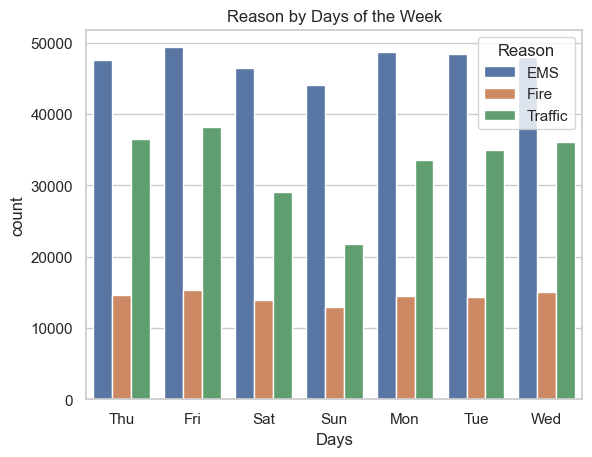

In [63]:
sns.countplot(x="Days", data=df, hue="Reason").set(title='Reason by Days of the Week') #countplot of the Day of Week column with the hue based off of the Reason column


<Axes: xlabel='Month', ylabel='count'>

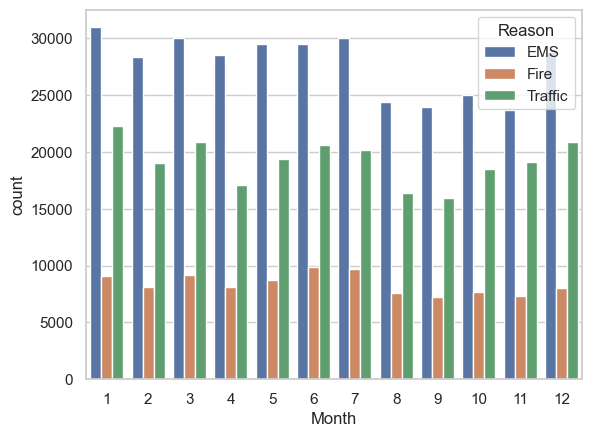

In [64]:
sns.countplot(x="Month", data=df, hue="Reason") #countplot of the reason for calls for each month

Text(0, 0.5, 'Total Count')

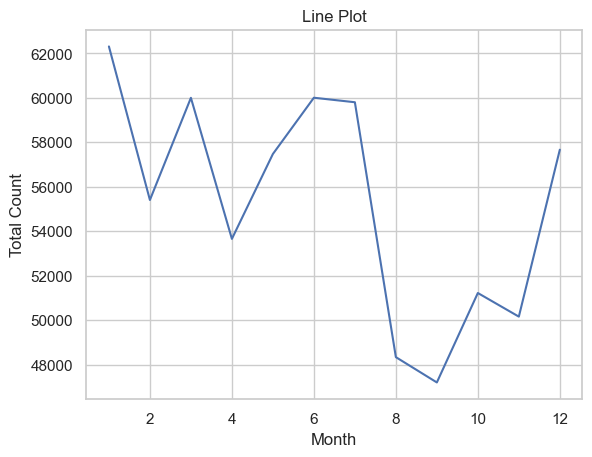

In [83]:
byMonth = df.groupby("Month").count() #finding the total calls per month and creating a plot
sns.lineplot(x="Month", y="twp", data=byMonth)
plt.title('Line Plot')
plt.xlabel('Month')
plt.ylabel('Total Count')

Text(11.828125000000002, 0.5, 'Total Count')

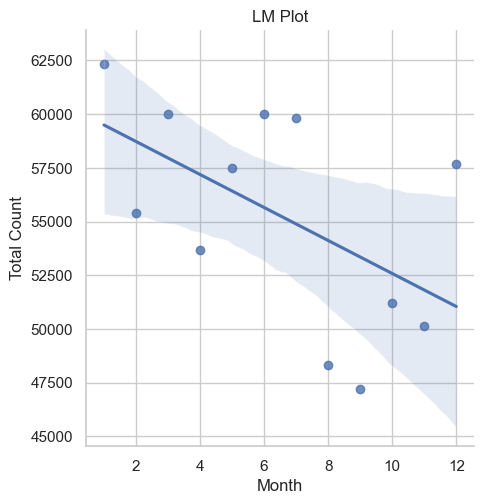

In [84]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.title('LM Plot')
plt.xlabel('Month')
plt.ylabel('Total Count')

In [69]:
from datetime import datetime

In [85]:
df['Date']=df['timeStamp'].apply(lambda x: x.date()) #creating a new column called Date from the timeStamp column

<Axes: xlabel='Date', ylabel='twp'>

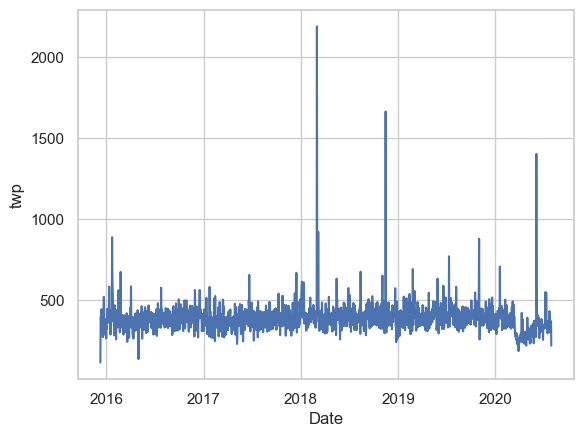

In [86]:
calls_by_day = df.groupby('Date').count()
sns.lineplot(x="Date",y="twp", data=calls_by_day) #plot of counts of 911 calls

In [73]:
df_2016=df[df["timeStamp"].dt.year==2016] #creating a new dataframe with only the calls from 2016
df_2016

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Days,Date,Week Day
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,4,Fri,2016-01-01,Fri
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,4,Fri,2016-01-01,Fri
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,4,Fri,2016-01-01,Fri
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,4,Fri,2016-01-01,Fri
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,4,Fri,2016-01-01,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150271,40.076383,-75.303797,FAYETTE ST & E 4TH AVE; CONSHOHOCKEN; Station...,19428.0,EMS: RESPIRATORY EMERGENCY,2016-12-31 23:22:07,CONSHOHOCKEN,FAYETTE ST & E 4TH AVE,1,EMS,23,12,5,Sat,2016-12-31,Sat
150272,40.296788,-75.450413,CHURCH RD & QUARRY RD; UPPER SALFORD; Station...,19438.0,EMS: SUBJECT IN PAIN,2016-12-31 23:29:04,UPPER SALFORD,CHURCH RD & QUARRY RD,1,EMS,23,12,5,Sat,2016-12-31,Sat
150273,40.121899,-75.288641,W GERMANTOWN PIKE & WALTON RD; PLYMOUTH; 2016-...,19462.0,Traffic: DISABLED VEHICLE -,2016-12-31 23:35:28,PLYMOUTH,W GERMANTOWN PIKE & WALTON RD,1,Traffic,23,12,5,Sat,2016-12-31,Sat
150274,40.110192,-75.259927,LORINE LN & CAMBURN RD; WHITEMARSH; Station 3...,19462.0,EMS: OVERDOSE,2016-12-31 23:45:47,WHITEMARSH,LORINE LN & CAMBURN RD,1,EMS,23,12,5,Sat,2016-12-31,Sat


<Axes: xlabel='Date', ylabel='twp'>

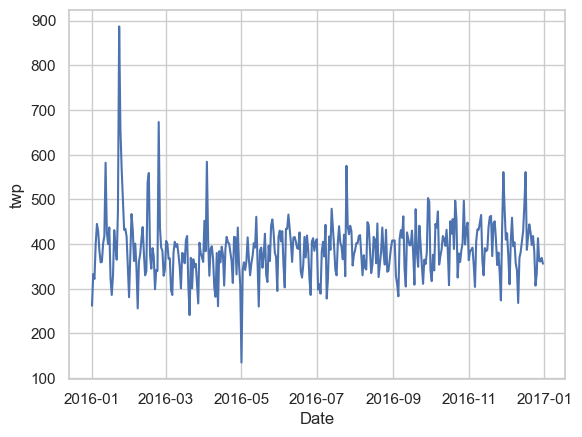

In [75]:
calls_in_2016 = df_2016.groupby("Date").count() #creating a plot of counts of 911 calls in 2016
sns.lineplot(x="Date", y="twp", data=calls_in_2016)

In [76]:
df[df['Reason']=="Fire"] #creating a dataframe of only the Fire calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Days,Date,Week Day
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,Thu,2015-12-10,Thu
22,40.199006,-75.300058,LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...,19446.0,Fire: APPLIANCE FIRE,2015-12-10 17:59:24,UPPER GWYNEDD,LILAC CT & PRIMROSE DR,1,Fire,17,12,3,Thu,2015-12-10,Thu
27,40.028903,-75.351822,EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...,19085.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 18:05:19,DELAWARE COUNTY,EDENTON PL & DURHAM DR,1,Fire,18,12,3,Thu,2015-12-10,Thu
39,40.104206,-75.367665,HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...,19406.0,Fire: GAS-ODOR/LEAK,2015-12-10 18:32:25,UPPER MERION,HAMPTON RD & BELMONT RD,1,Fire,18,12,3,Thu,2015-12-10,Thu
45,40.224923,-75.528045,LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...,19468.0,Fire: VEHICLE ACCIDENT,2015-12-10 18:50:23,LIMERICK,LINFIELD TRAPPE RD,1,Fire,18,12,3,Thu,2015-12-10,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663495,40.254768,-75.660459,SHOEMAKER RD & ROBINSON ST; POTTSTOWN; 2020-07...,19464.0,Fire: WOODS/FIELD FIRE,2020-07-29 14:57:58,POTTSTOWN,SHOEMAKER RD & ROBINSON ST,1,Fire,14,7,2,Wed,2020-07-29,Wed
663501,40.092286,-75.260835,1ST AVE & GERMANTOWN PIKE; WHITEMARSH; 2020-07...,19444.0,Fire: GAS-ODOR/LEAK,2020-07-29 15:20:58,WHITEMARSH,1ST AVE & GERMANTOWN PIKE,1,Fire,15,7,2,Wed,2020-07-29,Wed
663510,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Fire: VEHICLE FIRE,2020-07-29 15:32:04,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,1,Fire,15,7,2,Wed,2020-07-29,Wed
663516,40.066632,-75.143610,CHELSEA RD & EUSTON RD; CHELTENHAM; 2020-07-29...,19027.0,Fire: FIRE ALARM,2020-07-29 15:38:40,CHELTENHAM,CHELSEA RD & EUSTON RD,1,Fire,15,7,2,Wed,2020-07-29,Wed


<Axes: xlabel='Date'>

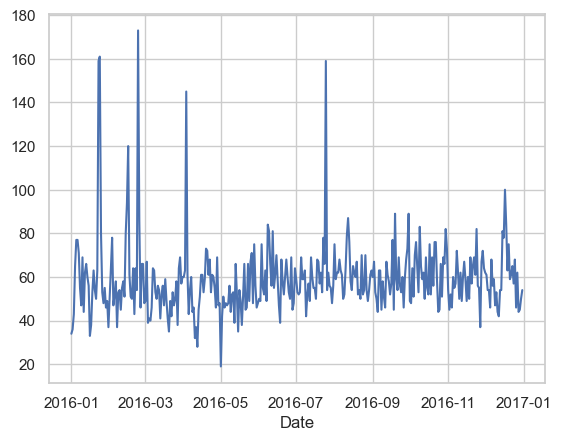

In [77]:
df[(df["timeStamp"].dt.year == 2016) & (df["Reason"]=="Fire")].groupby("Date").count()["twp"].plot() #creating a plot of counts of Fire calls in 2016

<Axes: xlabel='Date'>

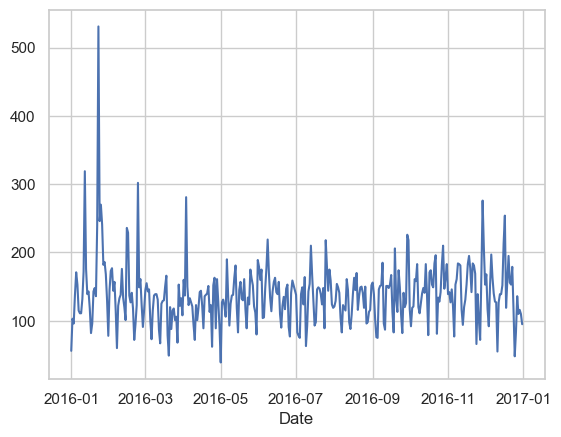

In [78]:
df[(df["timeStamp"].dt.year == 2016) & (df["Reason"]=="Traffic")].groupby("Date").count()["twp"].plot() #creating a plot of counts of Traffic calls in 2016

<Axes: xlabel='Date'>

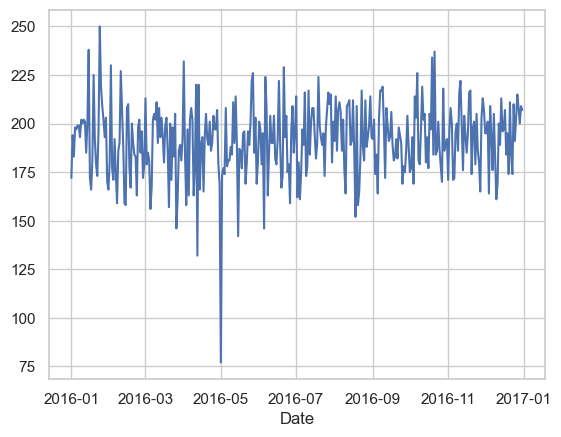

In [79]:
df[(df["timeStamp"].dt.year == 2016) & (df["Reason"]=="EMS")].groupby("Date").count()["twp"].plot() #creating a plot of counts of EMS calls in 2016

(array([16922., 16926., 16930., 16934., 16938., 16942., 16946., 16950.,
        16953.]),
 [Text(16922.0, 0, '2016-05-01'),
  Text(16926.0, 0, '2016-05-05'),
  Text(16930.0, 0, '2016-05-09'),
  Text(16934.0, 0, '2016-05-13'),
  Text(16938.0, 0, '2016-05-17'),
  Text(16942.0, 0, '2016-05-21'),
  Text(16946.0, 0, '2016-05-25'),
  Text(16950.0, 0, '2016-05-29'),
  Text(16953.0, 0, '2016-06-01')])

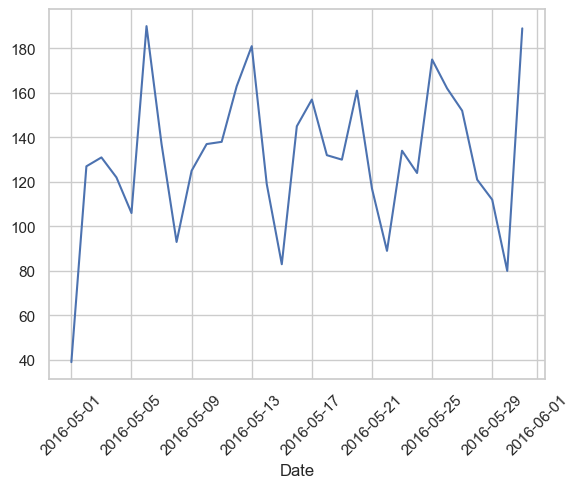

In [80]:
#Plotting for a single month in 2016 for Traffic Calls
df[(df["timeStamp"].dt.year == 2016) & (df["timeStamp"].dt.month == 5) & (df["Reason"]=="Traffic")].groupby("Date").count()["twp"].plot()
plt.xticks(rotation=45) 

<Axes: xlabel='Month', ylabel='Days'>

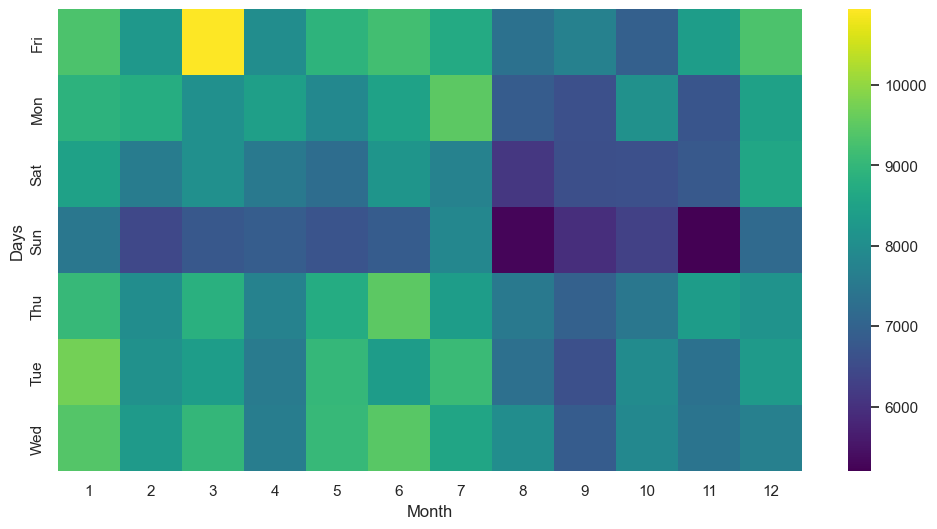

In [87]:
dayHour = df.groupby(by=['Days','Month']).count()['Reason'].unstack() #creating a heatmap of the Day of the Week vs Month
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')